# Определение перспективного тарифа для телеком компании

## Описание проекта

Компания «Мегалайн» — федеральный оператор сотовой связи, который предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
    
**Тариф «Смарт»**  
    Ежемесячная плата: 550 рублей  
    Включено: 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
    Стоимость услуг сверх тарифного пакета:  
    минута разговора: 3 рубля  
    сообщение: 3 рубля  
    1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**  
    Ежемесячная плата: 1950 рублей  
    Включено: 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
    Стоимость услуг сверх тарифного пакета:  
    минута разговора: 1 рубль  
    сообщение: 1 рубль  
    1 Гб интернет-трафика: 150 рублей.
    
Исходя из поставленной задачи разделим исследование на несколько частей:

[Часть 1. Изучение общей информации](#1.) 
* [1.1. Датасет calls](#1.1.)
* [1.2. Датасет internet](#1.2.)
* [1.3. Датасет messages](#1.3.)
* [1.4. Датасет tariffs](#1.4.)
* [1.5. Датасет users](#1.5.)  

[Часть 2. Предобработка данных](#2.)
* [2.1. Преобразование типа данных](#2.1.)
* [2.2. Преобразование ошибок в данных](#2.2.)
* [2.3. Ежемесячные расчеты по каждому пользователю](#2.3.)  

[Часть 3. Анализ данных](#3.)  

[Часть 4. Проверка гипотез](#4.)
* [4.1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#4.1.)
* [4.2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4.2.)

Закончим исследование ответом на поставленный вопрос.

### Часть 1. Изучение общей информации <a id='1.'></a> 

Загрузим необходимые библиотеки и изучим данные, предоставленные оператором сотовой связи для проведения исследования.

In [1]:
# Импортируем библиотеки, необходмые для анализа
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from functools import reduce

#### 1.1. Датасет  calls <a id='1.1.'></a> 

Прочитаем файл с данными о звонках calls.csv и сохраним его в переменной calls.

In [2]:
# Считаем файл calls.csv и сохраним в переменную calls 
calls = pd.read_csv('/datasets/calls.csv')

# Выведем первые 5 строк датафрейма
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Посмотрим общую информацию о датафрейме calls и всем признакам и их типам, воспользовавшись методом info ().

In [3]:
# Изучим общую информацию о датафрейме 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Разберем более подробно, какие столбцы и какую информацию о звонках содержит датафрейм:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Количество значений в столбцах совпадает, что говорит об отсутствии пропущенных значений в данном датафейме.

Проверим датасет calls на наличие дубликатов.

In [4]:
# Проверим датафрейм calls на наличие дубликатов
print('Количество дубликатов датасета calls:', calls.duplicated().sum())

Количество дубликатов датасета calls: 0


#### 1.2. Датасет  internet <a id='1.2.'></a> 

Прочитаем файл internet.csv с информацией о интернет-сессиях и сохраним его в переменной internet.

In [5]:
# Считаем файл internet.csv и сохраним в переменную internet 
internet = pd.read_csv('/datasets/internet.csv', index_col=0)

# Выведем первые 5 строк датафрейма
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Посмотрим общую информацию о датафрейме internet и всем признакам и их типам, воспользовавшись методом info ().

In [6]:
# Изучим общую информацию о датафрейме 
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Разберем более подробно, какие столбцы и какую информацию о интернет-сессиях содержит датафрейм:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Количество значений во всех столбцах одинаково - датафрейм internet не содержит пропущенных значений.

Проверим датафрейм на наличие дубликатов.

In [7]:
# Проверим датафрейм internet на наличие дубликатов
print('Количество дубликатов датасета internet:', internet.duplicated().sum())

Количество дубликатов датасета internet: 0


#### 1.3. Датасет  messages <a id='1.3.'></a> 

Прочитаем файл messages.csv с информацией о сообщениях и сохраним его в переменной messages.

In [8]:
# Считаем файл messages.csv и сохраним в переменную messages 
messages = pd.read_csv('/datasets/messages.csv')

# Выведем первые 5 строк датафрейма
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Посмотрим общую информацию о датафрейме messages и всем признакам и их типам, воспользовавшись методом info ().

In [9]:
# Изучим общую информацию о датафрейме 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Разберем более подробно, какие столбцы и какую информацию о сообщениях содержит датафрейм:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Одинаковое количество значений во всех столбцах говорит об отсутствии пропущенных значений.

Проверим датафрейм на наличие дубликатов.

In [10]:
# Проверим датафрейм messages на наличие дубликатов
print('Количество дубликатов датасета messages:', messages.duplicated().sum())

Количество дубликатов датасета messages: 0


#### 1.4. Датасет  tariffs <a id='1.4.'></a> 

Прочитаем файл tariffs.csv с информацией о тарифах и сохраним его в переменной tariffs.

In [11]:
# Считаем файл tariffs.csv и сохраним в переменную tariffs 
tariffs = pd.read_csv('/datasets/tariffs.csv')

# Выведем все строки датафрейма
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посмотрим общую информацию о датафрейме tariffs и всем признакам и их типам, воспользовавшись методом info ().

In [12]:
# Изучим общую информацию о датафрейме 
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Разберем более подробно, какие столбцы и какую информацию о тарифах содержит датафрейм:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Проверим датафрейм на наличие дубликатов.

In [13]:
# Проверим датафрейм tariffs на наличие дубликатов
print('Количество дубликатов датасета tariffs:', tariffs.duplicated().sum())

Количество дубликатов датасета tariffs: 0


#### 1.5. Датасет  users <a id='1.5.'></a> 

Прочитаем файл users.csv с информацией о пользователях и сохраним его в переменной users.

In [14]:
# Считаем файл users.csv и сохраним в переменную users 
users = pd.read_csv('/datasets/users.csv')

# Выведем все строки датафрейма
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим общую информацию о датафрейме users и всем признакам и их типам, воспользовавшись методом info ().

In [15]:
# Изучим общую информацию о датафрейме 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Разберем более подробно, какие столбцы и какую информацию о пользователях содержит датафрейм:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом 
* city — город проживания пользователя
* tariff — название тарифного плана

Количество значений в столбцах различается. Так, в столбце 'churn_date' есть значительное пропуски, которые нельзя игнорировать.

Проверим датафрейм на наличие дубликатов.

In [16]:
# Проверим датафрейм users на наличие дубликатов
print('Количество дубликатов датасета users:', users.duplicated().sum())

Количество дубликатов датасета users: 0


### Вывод

В нашем распоряжении несколько датасетов, содержащих различную информацию о пользователях и тарифах оператора сотовой сети.

По итогу детального изучения исходных данных обозначим ряд проблем, которые потребуется решить:

* значения столбца 'call_date' датасета calls необходимо преобразовать из строково типа в формат даты;
* значения столбца 'session_date' датасета internet необходимо преобразовать из строково типа в формат даты;
* значения столбца 'message_date' датасета messages необходимо преобразовать из строково типа в формат даты;
* значения столбца 'reg_date' датасета users необходимо преобразовать из строково типа в формат даты;
* значения столбца 'churn_date' датасета users необходимо преобразовать из строково типа в формат даты заполнить пропуски, исходя из информации, что тариф еще действовал на момент выгрузки данных;
* значения минут и мегабайтов не округлены вверх - что явно противоречит условиям оператора сотовой связи. 

### Часть 2. Предобработка данных <a id='2.'></a> 

Исправим ошибки в данных, преобразуем данные к нужным типам. Посчитаем ежемесячные показатели сделанных звонков, израсходованных минут, отправленных сообщений и выручку с каждого пользователя. 

#### 2.1. Преобразование типа данных <a id='2.1.'></a> 

Приведем данные к нужным типам в датафрейме calls и проверим результат.

In [17]:
# Приведем данные столбца 'call_date' к формату даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 

# Проверим результат
calls.dtypes 

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Приведем данные к нужным типам в датафрейме internet и проверим результат.

In [18]:
# Приведем данные столбца 'session_date' к формату даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# Проверим результат
internet.dtypes 

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Приведем данные к нужным типам в датафрейме messages и проверим результат.

In [19]:
# Приведем данные столбца 'message_date' к формату даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Проверим результат
messages.dtypes 

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

Приведем данные к нужным типам в датафрейме users и проверим результат.

In [20]:
# Приведем данные столбца 'churn_date' к формату даты
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') 

# Приведем данные столбца 'reg_date' к формату даты
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 

# Проверим результат
users.dtypes 

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

#### 2.2. Преобразование ошибок в данных <a id='2.2.'></a> 

Длительность звонка тарифицируется поминутно, поэтому округлим в большую сторону исходные значения столбца 'duration' датафрейма calls. Однако, нулевые значения данного столбца оставим без изменений, т.к. за попытку совершить звонок плата не снимается.

In [21]:
# Округлим значения столбца 'duration' 
calls['duration'] = calls['duration'].apply(np.ceil)

# Проверим результат
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Объём потраченного за сессию интернет-трафика преобразуем, округлив значения в мегабайтах в большую сторону. Проверим полученный результат.

In [22]:
# Округлим значения столбца 'mb_used' 
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

# Проверим результат
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


Пропущенные значения в столбце 'churn_date' датафрейма users могут говорить о том, что тариф ещё действовал на момент выгрузки данных. 
Заменим пропуски в дате прекращения пользования тарифом на строку 'still_using' и убедимся, что датафрейм более не содержит пропусков.

In [23]:
# Заменим пропуски в 'churn_date' на  'still_using'
users['churn_date'] = users['churn_date'].fillna('still_using') 

# Проверим результат
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,still_using,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,still_using,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,still_using,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,still_using,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,still_using,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### 2.3. Ежемесячные расчеты по каждому пользователю <a id='2.3.'></a> 

Добавим в датафрейм calls столбец с информацией о месяце, в котором был совершен звонок. 

In [24]:
# Добавим столбец 'month' в датафрейм calls
calls['month'] = calls['call_date'].dt.month 

# Проверим результат
# calls.sample(3) 

Посчитаем для каждого пользователя количество израсходованных минут разговора и сделанных звонков по месяцам.

In [25]:
# Создадим сводную таблицу с количеством сделанных звонков и израсходованных минут по месяцам
monthly_calls = calls.pivot_table(index=['user_id', 'month'],\
                                  values=['id', 'duration'],\
                                  aggfunc={'id': 'count', 'duration': 'sum'}).\
                                  rename(columns={'duration': 'minutes', 'id': 'calls_cnt'})

# Проверим результат
monthly_calls.head(10)

minutes  calls_cnt
user_id month                    
1000    5        159.0         22
        6        172.0         43
        7        340.0         47
        8        408.0         52
        9        466.0         58
        10       350.0         57
        11       338.0         43
        12       333.0         46
1001    11       430.0         59
        12       414.0         63

Добавим в датафрейм messages столбец с информацией о месяце, в котором было отправлено сообщение.

In [26]:
# Добавим столбец 'month' в датафрейм messages
messages['month'] = messages['message_date'].dt.month 

# Проверим результат
# messages.head(3) 

Посчитаем для каждого пользователя количество отправленных сообщенй по месяцам.

In [27]:
# Создадим сводную таблицу с количеством отправленных сообщений по месяцам
monthly_messages = messages.pivot_table(index=['user_id', 'month'],\
                                        values='id',\
                                        aggfunc='count').\
                                        rename(columns={'id': 'messages'})

# Проверим результат
monthly_messages.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Добавим в датафрейм internet столбец с информацией о месяце использования интернета.

In [28]:
# Добавим столбец 'month' в датафрейм internet
internet['month'] = internet['session_date'].dt.month 

# Проверим результат
# internet.head(3)

Посчитаем для каждого пользователя объем израсходованного трафика по месяцам.

In [29]:
# Создадим сводную таблицу с объемом израсходованного интернет-трафика по месяцам
monthly_internet = internet.pivot_table(index=['user_id', 'month'],\
                                        values='mb_used',\
                                        aggfunc='sum').\
                                        rename(columns={'mb_used': 'total_mb'})
# Проверим результат
monthly_internet.head(10)

total_mb
user_id month          
1000    5        2256.0
        6       23257.0
        7       14016.0
        8       14070.0
        9       14581.0
        10      14717.0
        11      14768.0
        12       9827.0
1001    11      18452.0
        12      14053.0

Для дальнейших расчетов потребуется объединить три сводные таблицы из предыдущих шагов с датафреймом users по общим столбцам.   

In [30]:
# Объединим из предыдущих шагов таблицы monthly_calls, monthly_messages, monthly_internet 
merged = monthly_calls.merge(monthly_messages, on=['user_id', 'month'], how='outer').\
                       merge(monthly_internet, on=['user_id', 'month'], how='outer')

# Сбросим индексы таблицы
merged.reset_index(inplace = True)

# Проверим результат
merged.head()

,user_id,month,minutes,calls_cnt,messages,total_mb
0,1000,5,159.0,22.0,22.0,2256.0
1,1000,6,172.0,43.0,60.0,23257.0
2,1000,7,340.0,47.0,75.0,14016.0
3,1000,8,408.0,52.0,81.0,14070.0
4,1000,9,466.0,58.0,57.0,14581.0


In [31]:
# Объединим таблицу merged с датафреймом users
merged = merged.merge(users, on=['user_id'], how='left')

# Оставим необходимые столбцы
merged = merged[['user_id', 'month', 'minutes', 'calls_cnt', 'messages', 'total_mb', 'tariff', 'city']]

# Проверим результат
merged.head()

,user_id,month,minutes,calls_cnt,messages,total_mb,tariff,city
0,1000,5,159.0,22.0,22.0,2256.0,ultra,Краснодар
1,1000,6,172.0,43.0,60.0,23257.0,ultra,Краснодар
2,1000,7,340.0,47.0,75.0,14016.0,ultra,Краснодар
3,1000,8,408.0,52.0,81.0,14070.0,ultra,Краснодар
4,1000,9,466.0,58.0,57.0,14581.0,ultra,Краснодар


Добавим к получившейся таблице данные об услугах, предоставляемых оператором в рамках того или иного тарифа из датафрейма tariffs. Проверим итоговый результат слияния данных из нескольких сводных таблиц и датафреймов.

In [32]:
# Объединим таблицу merged и датафрейм tariffs
merged = merged.merge(tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff', how='left')

# Проверим результат
merged.head()

,user_id,month,minutes,calls_cnt,messages,total_mb,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


Проверим полученную таблицу на наличие пропусков с помощью метода суммирования пропущенных значений.

In [33]:
# Проверим данные на наличие пропусков
merged.isna().sum()

user_id                    0
month                      0
minutes                   40
calls_cnt                 40
messages                 497
total_mb                  11
tariff                     0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Пропущенные значения свидетельствуют о том, что не все пользователи совершали звонки, отправляли сообщения или использовали интернет. Чтобы не потерять таких пользователей, найдем логичную замену для таких пропусков - заполним строки нулевыми значениями.  
После убедимся, что данные более не содержит пропусков.

In [34]:
# Заменим пропуски в данных на нулевые значения
merged = merged.fillna(0)

# Проверим результат
merged.isna().sum()

user_id                  0
month                    0
minutes                  0
calls_cnt                0
messages                 0
total_mb                 0
tariff                   0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Для упрощения дальнейших расчетов и улучшения визуализации данных полученной таблицы преобразуем количество сделанных звонков, израсходованных минут и отправленных сообщений к целому числу.

In [35]:
# Приведем количеством сделанных звонков, израсходованных минут и отправленных сообщений к целому числу
merged['minutes'] = merged['minutes'].astype(int) 
merged['calls_cnt'] = merged['calls_cnt'].astype(int)
merged['messages'] = merged['messages'].astype(int)

Преобразуем потраченные пользователями мегабайты интернет-трафика в единицы измерения, обозначенные оператором, - гигабайты. Округлим значения в большую сторону, чтобы приблизить даннные к условиям тарифных планов. Полученные значения, также приведем к целочисленному типу данных.

In [36]:
# Переведем потраченные Мб в Гб интернет-трафика и округлим вверх
merged['total_mb'] = merged['total_mb'] / 1024
merged['total_mb'] = merged['total_mb'].apply(np.ceil).astype(int) 

# Переведем объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) в Гб
merged['mb_per_month_included'] = (merged['mb_per_month_included'] / 1024).astype(int) 

Переименуем столбцы для удобства дальнейшей работы с данными и проверим полученный результат.

In [37]:
# Переименуем столбцы датафрейма merged
merged = merged.rename(columns={'total_mb': 'total_gb', 'mb_per_month_included': 'gb_per_month_included'})

# Проверим результат
merged.head()

,user_id,month,minutes,calls_cnt,messages,total_gb,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,22,22,3,ultra,Краснодар,1000,30,3000,1950,150,1,1
1,1000,6,172,43,60,23,ultra,Краснодар,1000,30,3000,1950,150,1,1
2,1000,7,340,47,75,14,ultra,Краснодар,1000,30,3000,1950,150,1,1
3,1000,8,408,52,81,14,ultra,Краснодар,1000,30,3000,1950,150,1,1
4,1000,9,466,58,57,15,ultra,Краснодар,1000,30,3000,1950,150,1,1


Найдем помесячную выручку с каждого пользователя: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану. 

Для начала зададим переменные для каждой характеристика тарифных планов, на случай каких-либо обновлений в условиях.

In [38]:
# Зададим переменные для каждой характеристики рассматриваемых тарифных планов
smart_rub_monthly_fee = 550
smart_minutes_included = 500
smart_messages_included = 50
smart_gb_per_month_included = 15
smart_rub_per_minute = 3
smart_rub_per_message = 3
smart_rub_per_gb = 200

ultra_rub_monthly_fee = 1950
ultra_minutes_included = 3000
ultra_messages_included = 1000
ultra_gb_per_month_included = 30
ultra_rub_per_minute = 1
ultra_rub_per_message = 1
ultra_rub_per_gb = 150

In [39]:
# Зададим функцию для расчета ежемесячной выручки по тарифным планам
def revenue(row):
    minutes = row['minutes']
    messages = row['messages']
    total_gb = row['total_gb']
    tariff = row['tariff']
    extra_minutes = 0
    extra_messages = 0
    extra_gb = 0
    
# Произведем рассчеты месячной выручки по каждому пользователю тарифа "Смарт"
    if tariff == 'smart':
        if minutes > smart_minutes_included:
            extra_minutes = (minutes - smart_minutes_included) * smart_rub_per_minute
        if messages > smart_messages_included:
            extra_messages = (messages - smart_messages_included) * smart_rub_per_message
        if total_gb > smart_gb_per_month_included:
            extra_gb = (total_gb - smart_gb_per_month_included) * smart_rub_per_gb
    
        return extra_minutes + extra_messages + extra_gb + smart_rub_monthly_fee
    
# Произведем рассчеты месячной выручки по каждому пользователю тарифа "Ультра"
    if tariff == 'ultra':
        if minutes > ultra_minutes_included:
            extra_minutes = (minutes - ultra_minutes_included) * ultra_rub_per_minute
        if messages > ultra_messages_included:
            extra_messages = (messages - ultra_messages_included) * ultra_rub_per_message
        if total_gb > ultra_gb_per_month_included:
            extra_gb = (total_gb - ultra_gb_per_month_included) * ultra_rub_per_gb
            
        return extra_minutes + extra_messages + extra_gb + ultra_rub_monthly_fee

# Добавим столец 'revenue' с ежемесячной выручкой по каждому пользователю
merged['revenue'] = merged.apply(revenue, axis=1)

# Посмотрим результат
merged.sample(5)

,user_id,month,minutes,calls_cnt,messages,total_gb,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
2197,1353,5,374,51,53,20,smart,Санкт-Петербург,50,15,500,550,200,3,3,1559
1386,1219,10,457,59,6,16,smart,Киров,50,15,500,550,200,3,3,750
1695,1272,11,187,32,78,25,ultra,Пенза,1000,30,3000,1950,150,1,1,1950
1862,1298,7,108,11,4,6,smart,Новосибирск,50,15,500,550,200,3,3,550
2348,1375,11,980,134,67,20,ultra,Пенза,1000,30,3000,1950,150,1,1,1950


### Вывод

На этапе предобработки была проведена большая работа над исходными данными. Так: 
* строковые данные были приведены к формату даты, дробные числа преобразованы в формат целочисленных;
* cогласно условиям тарифных планов показатели длительности звонков, объема потраченного интернет-трафика были округлены в большую сторону, а значения измеряемые мегабайтами - переведены в гигабайты;
* пропуски в дате прекращения пользования тарифным планом заменены на логичные значения. 

Для кажого пользователя были расчитаны ежемесячные показатели: количества сделанных звонков и израсходованных минут, количества отправленных сообщений, объема израсходованного интернет-трафика и выручки.

### Часть 3. Анализ данных данных <a id='3.'></a> 

Опишем поведение пользователей оператора сотовой связи, исходя из предоставленной выборки.

Найдем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в рамках месяца. Для этого разделим нашу выборку, согласно принадлежности пользователя к тарифу "Смарт" и "Ультра".

In [40]:
# Зададим переменную для пользователей тарифа "Смарт"
smart = merged.query('tariff == "smart"')

# Зададим переменную для пользователей тарифа "Ультра"
ultra = merged.query('tariff == "ultra"')

Найдем средние значения показателей для каждого из тарифных планов по месяцам.

In [41]:
# Найдем общее количество минут, сообщений и трафика, которые пользователи тратят ежемесячно при тарифе "Смарт"
smart_data = smart.pivot_table(index='month',\
                               values=['minutes', 'messages', 'total_gb', 'revenue'],\
                               aggfunc='mean')

# Проверим результат
smart_data

,messages,minutes,revenue,total_gb
month,,,,
1,18.235294,203.852941,721.323529,8.735294
2,24.086207,298.689655,827.603448,11.844828
3,31.857143,390.051948,1164.623377,15.246753
4,30.741071,367.133929,963.089286,13.642857
5,33.773050,387.361702,1204.602837,15.943262
6,33.402439,395.640244,1208.896341,15.981707
7,33.751244,408.353234,1228.925373,15.910448
8,33.638298,421.468085,1329.106383,16.782979
9,33.638462,428.611538,1255.330769,16.423077


In [42]:
# Найдем общее количество минут, сообщений и трафика, которые пользователи тратят ежемесячно при тарифе "Ультра"
ultra_data = ultra.pivot_table(index='month',\
                               values=['minutes', 'messages', 'total_gb', 'revenue'],\
                               aggfunc='mean')

# Проверим результат
ultra_data

,messages,minutes,revenue,total_gb
month,,,,
1,33.777778,428.111111,1950.000000,13.333333
2,21.958333,297.125000,1975.000000,12.000000
3,32.297297,489.648649,2014.864865,17.702703
4,31.563636,458.018182,2001.818182,17.000000
5,37.850746,510.328358,2061.940299,19.432836
6,41.726190,479.702381,2041.071429,18.964286
7,49.846154,545.791209,2121.428571,20.538462
8,48.439252,510.775701,2083.177570,19.635514
9,52.286957,539.443478,2024.347826,19.252174


Из полученных результатов четко прослеживается тенденция - роста средних показателей услуг от месяца к месяцу.

Далее рассмотрим количество потраченных минут, отправленных сообщений и объем использованного интернет-трафика более детально - найдем их среднее количество, дисперсию и стандартное отклонение по каждому из тарифов.

In [43]:
# Посчитаем среднее значение, дисперсию и старнадрное отклонение для пользователей тарифа "Смарт"
smart_stat = smart.pivot_table(index=['tariff'], 
                               values=['minutes', 'messages', 'total_gb'], 
                               aggfunc={'minutes': [np.mean, np.var, np.std], 
                                        'messages': [np.mean, np.var, np.std], 
                                        'total_gb': [np.mean, np.var, np.std]})

In [44]:
# Посчитаем среднее значение, дисперсию и старнадрное отклонение для пользователей тарифа "Смарт"
ultra_stat = ultra.pivot_table(index=['tariff'], 
                               values=['minutes', 'messages', 'total_gb'], 
                               aggfunc={'minutes': [np.mean, np.var, np.std], 
                                        'messages': [np.mean, np.var, np.std], 
                                        'total_gb': [np.mean, np.var, np.std]})

In [45]:
# Проверим результат
pd.concat([ultra_stat,smart_stat]).transpose()

tariff                 ultra         smart
messages mean      49.363452     33.384029
         std       47.804457     28.227876
         var     2285.266143    796.812958
minutes  mean     526.623350    417.934948
         std      317.606098    190.313730
         var   100873.633397  36219.315784
total_gb mean      19.525888     16.359354
         std        9.865848      5.758498
         var       97.334949     33.160304

Для большей наглядности построим для рассматриваемых признаков гистограммы и диаграммы распределения.

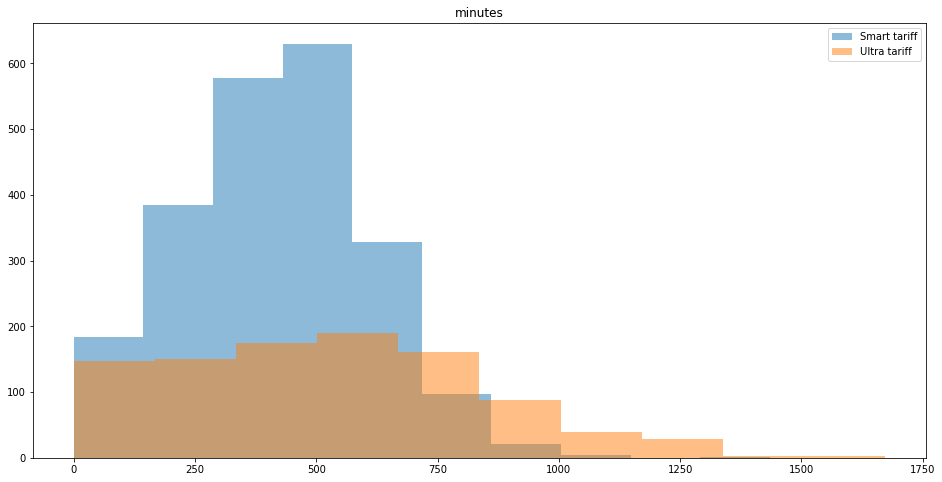

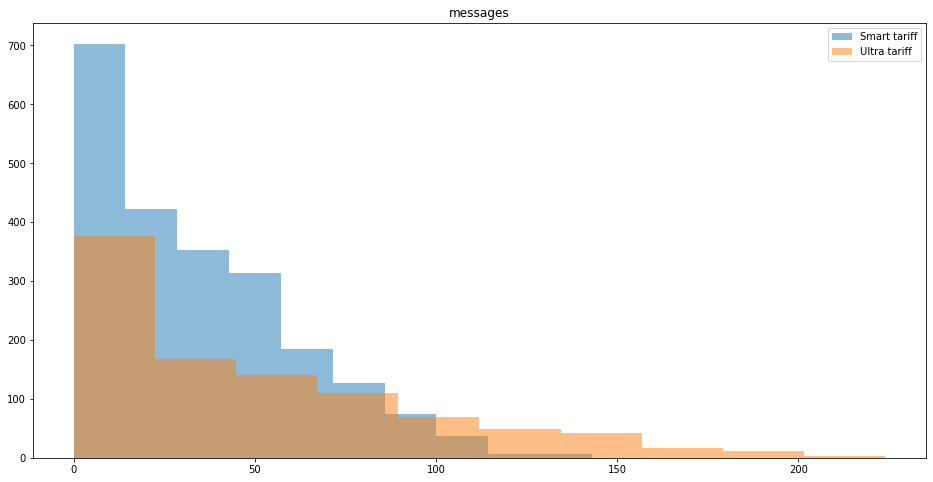

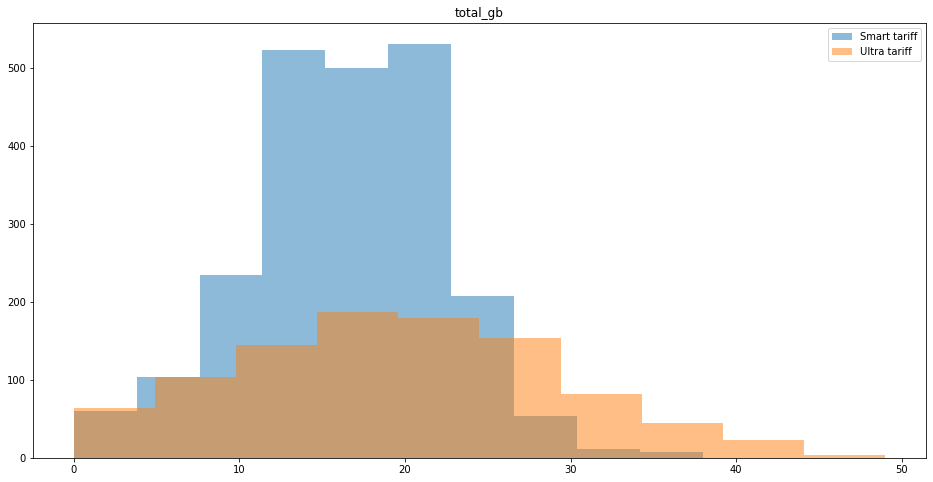

In [46]:
# Зададим переменную рассматриваемых признаков
columns = ['minutes','messages','total_gb']

# Построим гистограммы
for i in columns:
    plt.figure(figsize=(16,8))
    plt.hist(smart[i], label='Smart tariff', alpha=0.5)
    plt.hist(ultra[i], label='Ultra tariff', alpha=0.5)
    plt.title(i)
    plt.legend()
    plt.show()

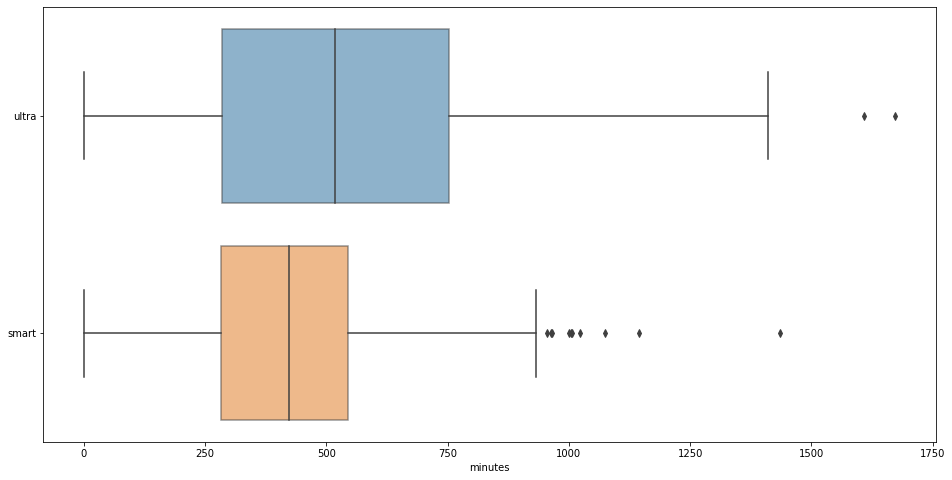

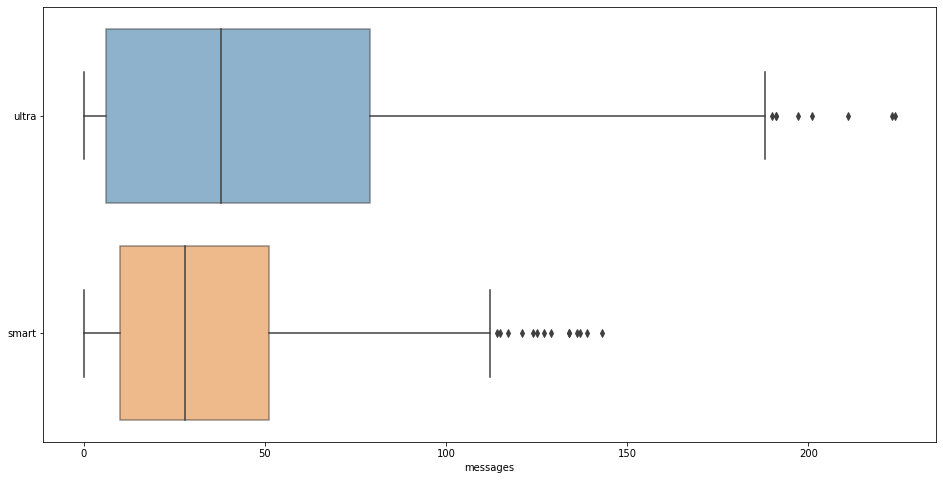

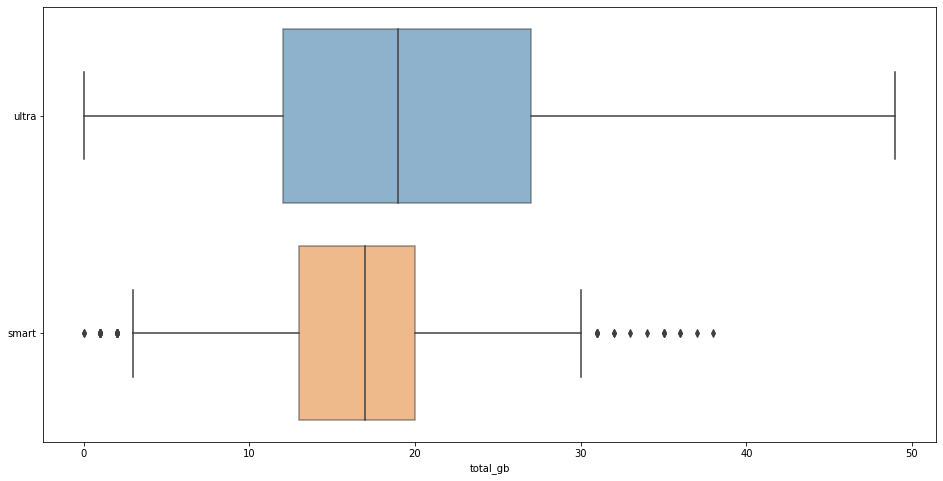

In [47]:
# Построим диаграммы распределения
for i in columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=merged, x=i, y='tariff', boxprops=dict(alpha=.55))
    plt.ylabel('')
    plt.show()

Сравнив количество использованных услуг, предоставляемых тарифными планами в рамках каждого месяца, мы увидели, что пользователи тарифа "Смарт" в среднем проговаривают около 430 минут, отправляют чуть больше 30 сообщений и расходуют примерно 16 ГБ интернет-трафика, в то время как пользователи тарифа "Ультра" - чуть больше 540 минут, почти 50 сообщений и почти 20 Гб трафика.

У тарифа "Смарт" наблюдается большее количество редких и выбивающихся значений по сравнению с тарифом "Ультра". Из гистограмм видно, что данные по более дорогому тарифу имеют больший разброс, что может говорить о том, что их пользователи более свободны в выборе и количестве используемых услуг, предоставляемых компанией.

Посчитаем выручку отдельно по каждому тарифу с учетом количества пользователей для каждого из них.

In [48]:
# Найдем количество пользователей каждого тарифа
ultra_users = len(users[users['tariff']=='ultra'])
print('Количество пользователей тарифа "Ультра":', ultra_users)

smart_users = len(users[users['tariff']=='smart'])
print('Количество пользователей тарифа "Смарт":', smart_users)

Количество пользователей тарифа "Ультра": 149
Количество пользователей тарифа "Смарт": 351


In [49]:
# Посчитаем годовую среднюю выручку с каждого тарифа
ultra_rev = merged.query('tariff == "ultra"')['revenue']
print('Cредняя годовая выручка по тарифу "Ультра": {:.0f} рублей'.format(ultra_rev.sum()))

smart_rev = merged.query('tariff == "smart"')['revenue']
print('Средняя годовая выручка по тарифу "Смарт": {:.0f} рублей'.format(smart_rev.sum()))

Cредняя годовая выручка по тарифу "Ультра": 2040000 рублей
Средняя годовая выручка по тарифу "Смарт": 2885751 рублей


In [50]:
# Посчитаем среднюю годовую выручку с каждого пользоватя в соответствии с его тарифом
print('В среднем один пользователь тарифа Ультра ежегодно приносит: {:.0f} рублей'.format(ultra_rev.sum()/ultra_users))
print('В среднем один пользователь тарифа Смарт ежегодно приносит: {:.0f} рублей'.format(smart_rev.sum()/smart_users))

В среднем один пользователь тарифа Ультра ежегодно приносит: 13691 рублей
В среднем один пользователь тарифа Смарт ежегодно приносит: 8222 рублей


### Вывод

Проанализировав потраченные на разговоры минуты, количество отправленных сообщений и объем израсходованного интернет-трафика можно заключить, что для обоих тарифов характерно увеличение средних значений данных параметров с каждым последующим месяцем.

Сравнительный анализ количества расходуемых услуг в рамках каждого месяца позволяет сделать вывод, что пользователи тарифного плана "Смарт" используют меньшее их количество, по сравнению с пользователями тарифа "Ультра". 

Что касается ежемесячной оплаты дополнительных минут, сообщений и интернета сверх тарифного плана, то лидирующую позицию здесь занимают пользователи тарифа "Смарт" - это достигается за счет более строгих ограничений по количеству предоставляемых услуг согласно условиям данного тарифа. 

### Часть 4. Проверка гипотез <a id='4.'></a> 

Сформулируем нулевую и альтернативную гипотезы и проверим различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» и отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.


#### 4.1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  <a id='4.1.'></a> 

Для проверки равенства средних значений в двух выборках применим методов статистической проверки гипотез - t-критерий Стьюдента. Зададим уровень значимости, равный 0.05, что означает, что при проверке гипотезы допускается не более, чем 5% вероятность ошибки. 

H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.  
H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [51]:
# Зададим критический уровень статистической значимости
alpha=.05 

# Проверим выдвинутую гипотезу при помощи t-теста
results = scipy.stats.ttest_ind(ultra_rev, smart_rev, equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Найдем среднюю выручку, получаемую от пользователей каждого из тарифных планов в рамках месяца.

In [52]:
# Найдем среднюю ежемесячную выручку от пользователей по каждому из тарифов
print('Средняя выручка пользователей тарифа «Ультра»:', ultra_rev.median())
print('Средняя выручка пользователей тарифа «Смарт»:', smart_rev.median())

Средняя выручка пользователей тарифа «Ультра»: 1950.0
Средняя выручка пользователей тарифа «Смарт»: 1038.0



В нашем случае нулевую гипотезу можно отвергнуть в пользу альтернативной гипотезы, т.к. по результатам статистического теста вероятность
ошибки (p-значение) не превышает данное значение, т.е. наличие различий в средней выручке  пользователей тарифов «Ультра» и «Смарт» подтвердилось.

#### 4.2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  <a id='4.2.'></a> 

Сделаем выборку по пользователям из Москвы и пользователям из других городов и проверим сформулированные нулевую и альтернативную гипотезы.

In [57]:
# Зададим переменные для пользователей 
moscow_city = merged.query('city == "Москва"')['revenue']
other_city = merged.query('city != "Москва"')['revenue']

H0: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.  
H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [58]:
# Зададим критический уровень статистической значимости
alpha=.05 

# Проверим выдвинутую гипотезу при помощи t-теста
results = scipy.stats.ttest_ind(moscow_city, other_city, equal_var=False)

print('p-значение: ', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 

p-значение:  0.5126564657748214
Не можем отвергнуть нулевую гипотезу


По результатам данного статистического теста видно, что вероятность ошибки - более заданного значения в 5%. Можно считать, что разница вполне может быть случайной и поэтому нельзя отклонить нулевую гипотезу, т.е. средняя выручка пользователей из Москвы схожа с выручкой пользователей из других регионов.

### Вывод

Проведя статистический анализ мы заключили, что средняя выручка, полученная от пользователей каждого из тарифов, - различна, а средняя выручка по Москве и регионам будет схожей, т.е. не зависит их места проживания пользователей.

### Общий вывод

В рамках данного статистического исследования нами была изучена и обработана информация, предоставленная оператором сотовой связи - "Мегалайн". Для каждого из пользователей рассчитано количество потраченных минут, отправленных сообщений и расход интернет-трафика в рамках каждого месяца, а также помесячная выручка с каждого пользователя. 

Проанализировав данные выборки можно отметить, что пользователи тарифа "Смарт" более подвержены тратам на услуги сверх абонентской платы, чего нельзя сказать о пользователях тарифа "Ультра", которые зачастую не в полном объеме расходуют услуги своего пакета. 

Из результатов статистического анализа видно, что место проживания пользователей - Москва или регионы, не влияет на объем полученной выручки. Однако, если брать во внимание каждый из тарифов отдельно, то выручки от них будут различны.  

К ответу на вопрос исследования - какой тариф приносит больше денег можно подойти с двух сторон: какой тариф приносит больше денег с клиента или какой тариф приносят больше выручки в рамках календарного года.

Пользователь тарифа "Ультра" в рамках одного месяца тратит на услуги оператора в среднем 1950 рублей, в то время как пользователь тарифа "Смарт" - чуть больше 1000 рублей. От одного пользователя тарифа "Ультра" компания ежегодно получает выручки примерно на 5500 рублей больше, чем от пользователей тарифа "Смарт".   
    
Однако, по итогам года можно судить, что общая выручка, полученная от пользователей "Смарта" - 2 885 751 рублей, что почти на 845 000 рублей больше, чем выручка, полученная от пользователей "Ультра", исходя из количество пользователей - 351 и 149 соответственно.

Поводя итог исследованию, отметим, что тариф "Ультра" приносит больше денег с клиента, а тариф "Смарт" - больше выручки за год.